# **Akuransi sklearnPCA pada Data Iris**

**Naive PCA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Firdatulayuni/Pendata/main/iris.csv', sep=',')
df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Setosa             50
Versicolor         50
Virginica          50
Name: class, dtype: int64

In [5]:
df.columns

Index(['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'class'], dtype='object')

In [8]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

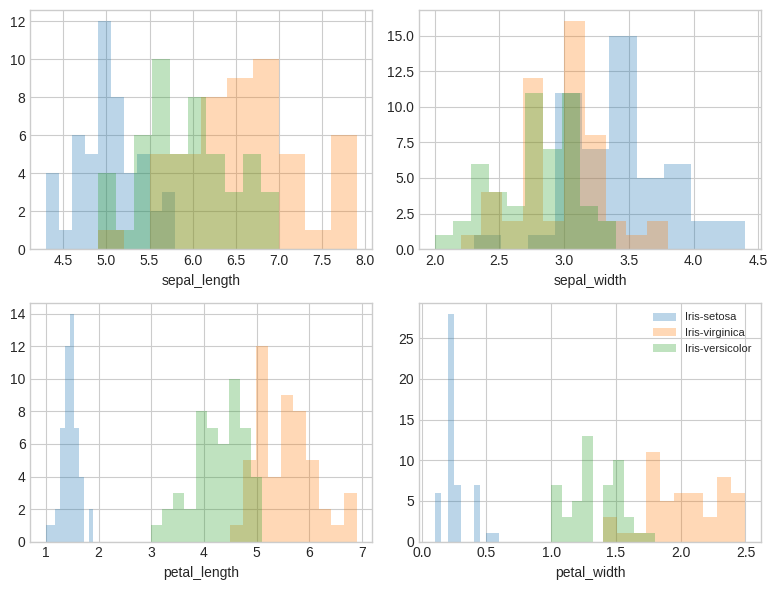

In [10]:
label_dict={1: 'Iris-setosa',
           2: 'Iris-virginica',
           3: 'Iris-versicolor'}
feature_dict={0: 'sepal_length',1: 'sepal_width',2: 'petal_length',3: 'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        for lab in ('Iris-setosa','Iris-virginica','Iris-versicolor'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [13]:
X_std.shape[0]-1

299

In [14]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print("Covariance Matrix \n%s" %cov_mat)
                 

Covariance Matrix 
[[ 1.00334448 -0.11385853  0.87466949  0.82068276]
 [-0.11385853  1.00334448 -0.42590552 -0.36254685]
 [ 0.87466949 -0.42590552  1.00334448  0.9660308 ]
 [ 0.82068276 -0.36254685  0.9660308   1.00334448]]


In [15]:
print("Numpy Covariance matrix \n%s" %np.cov(X_std.T))

Numpy Covariance matrix 
[[ 1.00334448 -0.11385853  0.87466949  0.82068276]
 [-0.11385853  1.00334448 -0.42590552 -0.36254685]
 [ 0.87466949 -0.42590552  1.00334448  0.9660308 ]
 [ 0.82068276 -0.36254685  0.9660308   1.00334448]]


In [ ]:
cov_mat=np.cov(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

**Korelasi Matriks**

In [16]:
corr_mat1=np.corrcoef(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(corr_mat1)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52171778 -0.37486813 -0.72029777  0.26164013]
 [-0.26636854 -0.9244304   0.24319552 -0.12382316]
 [ 0.58083504 -0.02280557  0.14150831 -0.80130267]
 [ 0.56523359 -0.06619834  0.63403664  0.52357072]]
Eigenvelues 
[2.9146437  0.91763544 0.14705928 0.02066158]


**Eigendekomposisi data mentah berdasarkan matriks korelasi**

In [17]:
cor_mat2=np.corrcoef(X.T)
eig_vals, eig_vecs=np.linalg.eig(cor_mat2)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52171778 -0.37486813 -0.72029777  0.26164013]
 [-0.26636854 -0.9244304   0.24319552 -0.12382316]
 [ 0.58083504 -0.02280557  0.14150831 -0.80130267]
 [ 0.56523359 -0.06619834  0.63403664  0.52357072]]
Eigenvelues 
[2.9146437  0.91763544 0.14705928 0.02066158]


**Dekomposisi Nilai Singular**

In [18]:
u, s, v=np.linalg.svd(X_std.T)
u

array([[-0.52171778, -0.37486813,  0.72029777,  0.26164013],
       [ 0.26636854, -0.9244304 , -0.24319552, -0.12382316],
       [-0.58083504, -0.02280557, -0.14150831, -0.80130267],
       [-0.56523359, -0.06619834, -0.63403664,  0.52357072]])

**Mengurutkan Eigenpair**

In [19]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Everithing is ok")

Everithing is ok


In [20]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.914643702203565
0.9176354378175842
0.14705927550261844
0.020661584476230434


**Menjelaskan Varians**

In [21]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

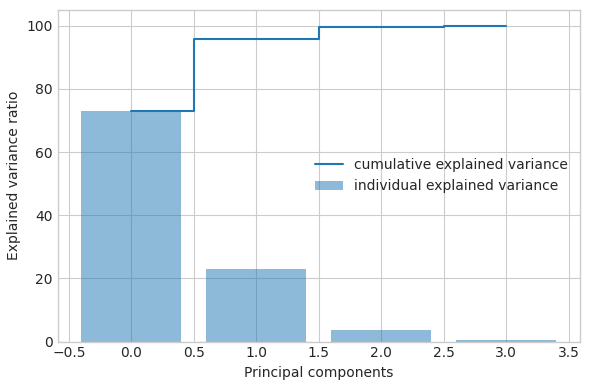

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**Matriks Proyeksi**

In [23]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52171778 -0.37486813]
 [-0.26636854 -0.9244304 ]
 [ 0.58083504 -0.02280557]
 [ 0.56523359 -0.06619834]]


**Proyeksi Ke Ruang Fitur Baru**

In [24]:
Y = X_std.dot(matrix_w)

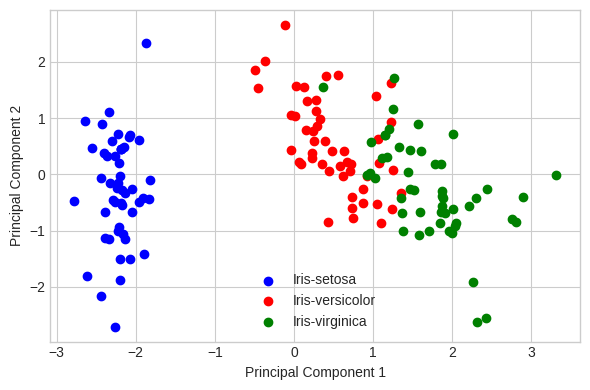

In [25]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

**Shortcut - PCA in scikit-learn**

In [26]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

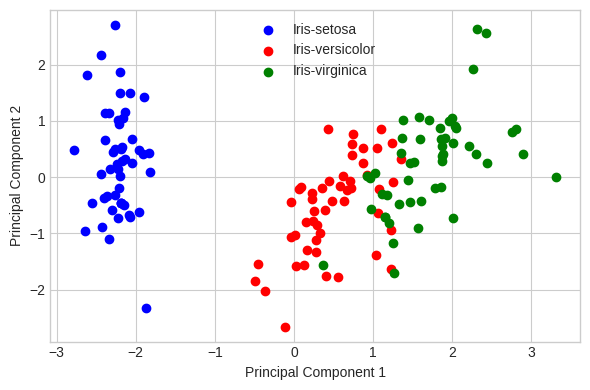

In [28]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

### **NAIVE PCA**

In [29]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y']
data

,X,Y
0,-2.264652,0.492794
1,-2.083700,-0.664823
2,-2.366105,-0.330254
3,-2.301801,-0.586438
4,-2.389345,0.660727
...,...,...
295,1.870506,0.384920
296,1.561554,-0.900968
297,1.521002,0.267951
298,1.374565,1.013822


In [31]:
data['class']=df['class']
data

,X,Y,class
0,-2.264652,0.492794,Iris-setosa
1,-2.083700,-0.664823,Iris-setosa
2,-2.366105,-0.330254,Iris-setosa
3,-2.301801,-0.586438,Iris-setosa
4,-2.389345,0.660727,Iris-setosa
...,...,...,...
295,1.870506,0.384920,Virginica
296,1.561554,-0.900968,Virginica
297,1.521002,0.267951,Virginica
298,1.374565,1.013822,Virginica


In [33]:
dataset =data
X = dataset.iloc[:,:2].values
y = dataset['class'].values
dataset.head(5)

,X,Y,class
0,-2.264652,0.492794,Iris-setosa
1,-2.083700,-0.664823,Iris-setosa
2,-2.366105,-0.330254,Iris-setosa
3,-2.301801,-0.586438,Iris-setosa
4,-2.389345,0.660727,Iris-setosa


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [37]:
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Setosa', 'Setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Setosa', 'Iris-versicolor',
       'Versicolor', 'Versicolor', 'Setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Setosa',
       'Virginica', 'Iris-virginica', 'Setosa', 'Iris-versicolor',
       'Setosa', 'Iris-setosa', 'Iris-setosa', 'Setosa',
       'Iris-versicolor', 'Versicolor', 'Setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Versicolor', 'Iris-virginica',
       'Iris-virginica', 'Versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iri

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.36666666666666664


array([[ 3,  0,  0,  7,  0,  0],
       [ 0,  7,  2,  0,  3,  0],
       [ 0,  0,  4,  0,  1,  2],
       [ 4,  0,  0,  5,  0,  0],
       [ 0, 11,  1,  0,  2,  0],
       [ 0,  0,  7,  0,  0,  1]])

### **KNN PCA**

In [39]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y']
data

,X,Y
0,-2.264652,0.492794
1,-2.083700,-0.664823
2,-2.366105,-0.330254
3,-2.301801,-0.586438
4,-2.389345,0.660727
...,...,...
295,1.870506,0.384920
296,1.561554,-0.900968
297,1.521002,0.267951
298,1.374565,1.013822


In [40]:
data['class']=df['class']
data

,X,Y,class
0,-2.264652,0.492794,Iris-setosa
1,-2.083700,-0.664823,Iris-setosa
2,-2.366105,-0.330254,Iris-setosa
3,-2.301801,-0.586438,Iris-setosa
4,-2.389345,0.660727,Iris-setosa
...,...,...,...
295,1.870506,0.384920,Virginica
296,1.561554,-0.900968,Virginica
297,1.521002,0.267951,Virginica
298,1.374565,1.013822,Virginica


In [42]:
dataset = data
X = dataset.iloc[:,:2].values
y = dataset['class'].values
dataset.head(5)

,X,Y,class
0,-2.264652,0.492794,Iris-setosa
1,-2.083700,-0.664823,Iris-setosa
2,-2.366105,-0.330254,Iris-setosa
3,-2.301801,-0.586438,Iris-setosa
4,-2.389345,0.660727,Iris-setosa


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Virginica', 'Iris-setosa', 'Virginica',
       'Setosa', 'Iris-setosa', 'Virginica', 'Versicolor',
       'Iris-versicolor', 'Setosa', 'Iris-setosa', 'Versicolor',
       'Iris-virginica', 'Versicolor', 'Iris-virginica', 'Iris-setosa',
       'Versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Virginica',
       'Virginica', 'Setosa', 'Iris-versicolor', 'Setosa', 'Iris-setosa',
       'Iris-setosa', 'Setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Setosa', 'Versicolor', 'Iris-setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Iris-virginica', 'Versicolor', 'Iris-virginica',
       'Versicolor', 'Iris-versicolor', 'Versicolor', 'Virginica',
       'Iris-versicolor', 'Iris-setosa', 'Virginica', 'Iris-versicolor',
       'Versicolor', 'Iris-virginica', 'Iris-virginica', 'Versicolor',
       'Versicolor', 'Iris-setosa',

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.21666666666666667


array([[ 5,  0,  0,  5,  0,  0],
       [ 0,  0,  1,  0, 10,  1],
       [ 0,  2,  2,  0,  0,  3],
       [ 8,  0,  0,  1,  0,  0],
       [ 0,  8,  1,  0,  3,  2],
       [ 0,  0,  6,  0,  0,  2]])

In [48]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,Versicolor,Iris-versicolor
1,Virginica,Iris-virginica
2,Setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Versicolor,Iris-virginica
5,Versicolor,Virginica
6,Setosa,Iris-setosa
7,Iris-virginica,Virginica
8,Iris-setosa,Setosa
9,Setosa,Iris-setosa


### **ANNBP PCA**

In [72]:
df=pd.read_csv('https://raw.githubusercontent.com/Firdatulayuni/Pendata/main/iris.csv')
df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y',]
data

,X,Y
0,-2.264652,0.492794
1,-2.083700,-0.664823
2,-2.366105,-0.330254
3,-2.301801,-0.586438
4,-2.389345,0.660727
...,...,...
295,1.870506,0.384920
296,1.561554,-0.900968
297,1.521002,0.267951
298,1.374565,1.013822


In [75]:
data['class']=df['class']
data

,X,Y,class
0,-2.264652,0.492794,Iris-setosa
1,-2.083700,-0.664823,Iris-setosa
2,-2.366105,-0.330254,Iris-setosa
3,-2.301801,-0.586438,Iris-setosa
4,-2.389345,0.660727,Iris-setosa
...,...,...,...
295,1.870506,0.384920,Virginica
296,1.561554,-0.900968,Virginica
297,1.521002,0.267951,Virginica
298,1.374565,1.013822,Virginica


In [76]:
dt=data
dt

,X,Y,class
0,-2.264652,0.492794,Iris-setosa
1,-2.083700,-0.664823,Iris-setosa
2,-2.366105,-0.330254,Iris-setosa
3,-2.301801,-0.586438,Iris-setosa
4,-2.389345,0.660727,Iris-setosa
...,...,...,...
295,1.870506,0.384920,Virginica
296,1.561554,-0.900968,Virginica
297,1.521002,0.267951,Virginica
298,1.374565,1.013822,Virginica


In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [79]:
y = dt['class']
x = dt.drop(['class'], axis=1)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=27)

In [81]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.001)

In [82]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

Iteration 1, loss = 1.82761943
Iteration 2, loss = 1.82520648
Iteration 3, loss = 1.82152463
Iteration 4, loss = 1.81684246
Iteration 5, loss = 1.81140076
Iteration 6, loss = 1.80524732
Iteration 7, loss = 1.79866762
Iteration 8, loss = 1.79175197
Iteration 9, loss = 1.78453446
Iteration 10, loss = 1.77734423
Iteration 11, loss = 1.76988139
Iteration 12, loss = 1.76264651
Iteration 13, loss = 1.75533662
Iteration 14, loss = 1.74810268
Iteration 15, loss = 1.74099407
Iteration 16, loss = 1.73394955
Iteration 17, loss = 1.72703817
Iteration 18, loss = 1.72011720
Iteration 19, loss = 1.71337058
Iteration 20, loss = 1.70675748
Iteration 21, loss = 1.70008357
Iteration 22, loss = 1.69369700
Iteration 23, loss = 1.68723782
Iteration 24, loss = 1.68081492
Iteration 25, loss = 1.67450511
Iteration 26, loss = 1.66814582
Iteration 27, loss = 1.66186067
Iteration 28, loss = 1.65558942
Iteration 29, loss = 1.64931711
Iteration 30, loss = 1.64310944
Iteration 31, loss = 1.63693110
Iteration 32, los

In [83]:
accuracy_score(y_test, y_pred)

0.4166666666666667

In [84]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
231,Versicolor,Iris-versicolor
155,Setosa,Iris-setosa
235,Versicolor,Virginica
3,Iris-setosa,Iris-setosa
152,Setosa,Iris-setosa
95,Iris-versicolor,Versicolor
106,Iris-virginica,Iris-versicolor
165,Setosa,Iris-setosa
258,Virginica,Iris-virginica
272,Virginica,Iris-virginica


### **DT PCA**

In [88]:
df=pd.read_csv('https://raw.githubusercontent.com/Firdatulayuni/Pendata/main/iris.csv')
df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y']
data

,X,Y
0,-2.264652,0.492794
1,-2.083700,-0.664823
2,-2.366105,-0.330254
3,-2.301801,-0.586438
4,-2.389345,0.660727
...,...,...
295,1.870506,0.384920
296,1.561554,-0.900968
297,1.521002,0.267951
298,1.374565,1.013822


In [90]:
data['class']=df['class']
data

,X,Y,class
0,-2.264652,0.492794,Iris-setosa
1,-2.083700,-0.664823,Iris-setosa
2,-2.366105,-0.330254,Iris-setosa
3,-2.301801,-0.586438,Iris-setosa
4,-2.389345,0.660727,Iris-setosa
...,...,...,...
295,1.870506,0.384920,Virginica
296,1.561554,-0.900968,Virginica
297,1.521002,0.267951,Virginica
298,1.374565,1.013822,Virginica


In [91]:
df = data
df

,X,Y,class
0,-2.264652,0.492794,Iris-setosa
1,-2.083700,-0.664823,Iris-setosa
2,-2.366105,-0.330254,Iris-setosa
3,-2.301801,-0.586438,Iris-setosa
4,-2.389345,0.660727,Iris-setosa
...,...,...,...
295,1.870506,0.384920,Virginica
296,1.561554,-0.900968,Virginica
297,1.521002,0.267951,Virginica
298,1.374565,1.013822,Virginica


In [93]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Setosa             50
Versicolor         50
Virginica          50
Name: class, dtype: int64

In [94]:
df.isnull().sum()

X        0
Y        0
class    0
dtype: int64

In [96]:
X = df.drop(['class'], axis=1)
y = df['class']

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 21)

In [98]:
X_train.shape, X_test.shape

((201, 2), (99, 2))

In [99]:
X_train.dtypes

X    float64
Y    float64
dtype: object

In [100]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.5 MB/s eta 0:00:00


In [101]:
encoder = ce.OrdinalEncoder(cols=["X","Y"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [102]:
X_train.head()

,X,Y
141,1,1
142,2,2
173,3,3
17,4,4
269,5,5


In [103]:
X_test.head()

,X,Y
61,86.0,86.0
219,42.0,42.0
55,40.0,40.0
244,82.0,82.0
95,103.0,103.0


In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=21)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=21)

In [106]:
y_pred_gini = clf_gini.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.11


In [108]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Setosa', 'Setosa', 'Setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa

In [109]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.22


In [110]:
print('Training set score: {:.2f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.22
Test set score: 0.11


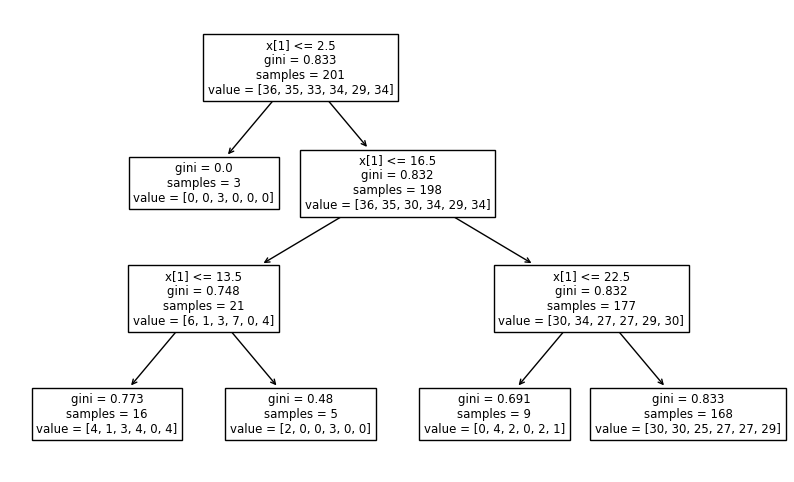

In [111]:
plt.figure(figsize=(10,6))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()